In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('salary.csv')
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


Central tendency measures per employment status.

In [91]:
tendency_measures = df.groupby("Employment Status")["Rating"].agg(("mean", "median", "std", "min", "max"))
tendency_measures

,mean,median,std,min,max
Employment Status,,,,,
Contractor,3.869982,3.9,0.444340,1.0,5.0
Full Time,3.913427,3.9,0.520779,1.0,5.0
Intern,3.977350,4.0,0.521397,1.0,5.0
Trainee,3.857576,3.9,0.640327,1.8,4.9


In [92]:
df["Salary Range"] = ["low" if x <= 300_000 else "medium" if x <= 900_000 else "high" for x in df["Salary"]]
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary Range
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,medium
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,medium
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,high
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,low
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,medium
...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,low
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,low
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,low
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,low


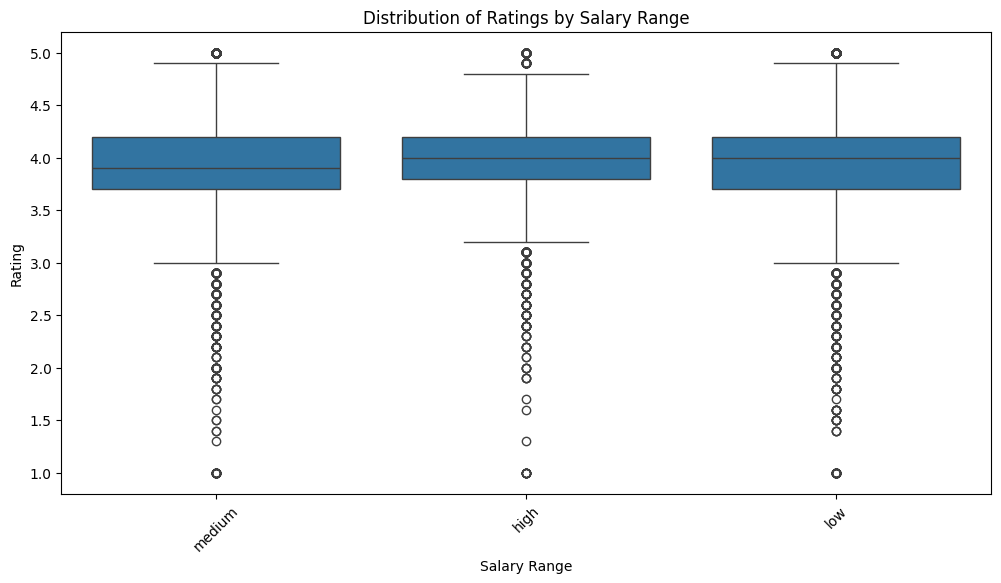

In [93]:
plt.figure(figsize=(12, 6))
plt.title("Distribution of Ratings by Salary Range")
plt.xticks(rotation=45)
sns.boxplot(data=df, x="Salary Range", y="Rating")
plt.show()